<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

# Datetime Packages
from datetime import date
from datetime import timedelta
import datetime

In [2]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("BTC-USD", start="2000-01-01", end=date.today() - datetime.timedelta(days=0))

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


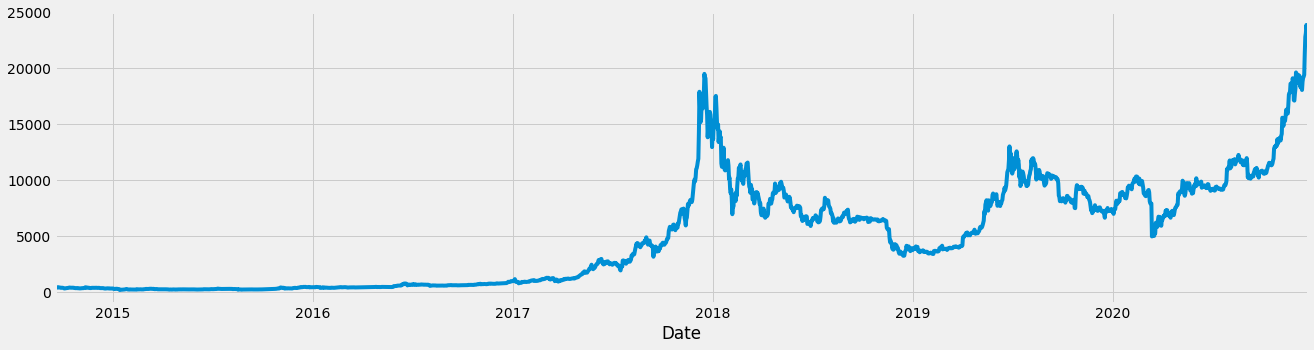

In [4]:
data['Adj Close'].plot(figsize=(20,5));

9.700848826161632

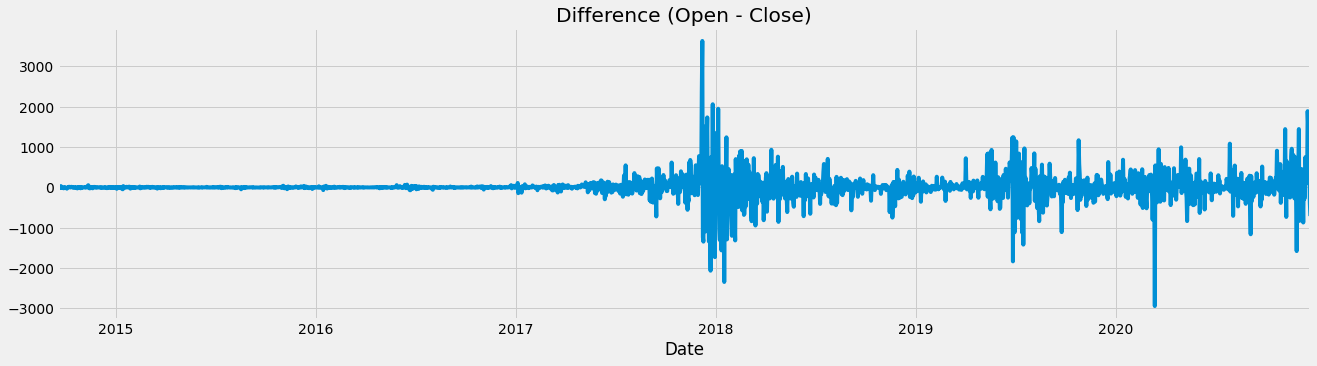

In [5]:
# Plot Close minus Open
plt.figure(figsize=(20,5))
diff = data['Close'] - data['Open']
diff.plot()
plt.title('Difference (Open - Close)')
diff.mean()

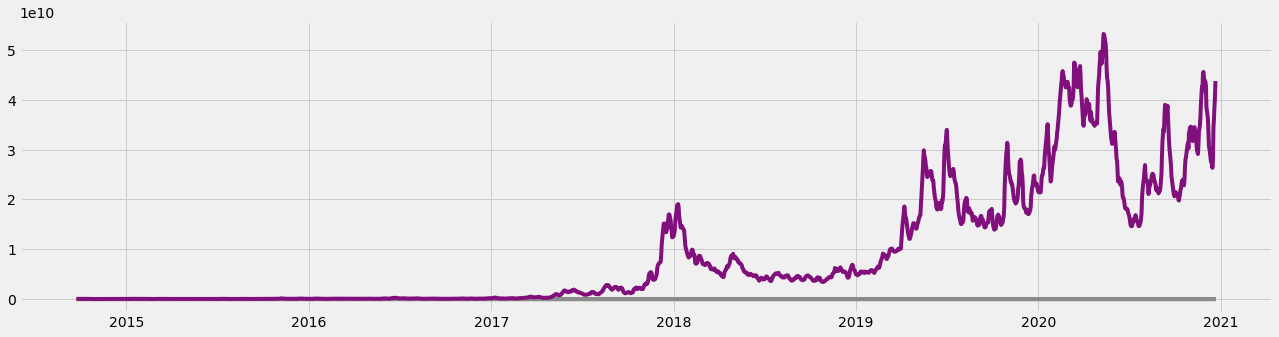

In [6]:
# Plot rolling mean
plt.figure(figsize=(20,5))
dfMean = data.rolling(window=7).mean()
plt.plot(dfMean);

In [7]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998976,0.998449,0.997931,0.997931,0.741127
High,0.998976,1.000000,0.998006,0.999110,0.999110,0.742005
Low,0.998449,0.998006,1.000000,0.998928,0.998928,0.742515
Close,0.997931,0.999110,0.998928,1.000000,1.000000,0.742016
Adj Close,0.997931,0.999110,0.998928,1.000000,1.000000,0.742016
Volume,0.741127,0.742005,0.742515,0.742016,0.742016,1.000000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-17,0.097304,0.101764,0.100338,0.070132,0.070132,0.607300
2020-12-18,0.070322,-0.017090,0.054870,0.014593,0.014593,-0.434174
2020-12-19,0.014297,0.036459,0.019047,0.031631,0.031631,-0.047052
2020-12-20,0.031509,0.005140,0.014073,-0.016445,-0.016445,-0.016715
2020-12-21,-0.011391,-0.006460,-0.041732,-0.025456,-0.025456,0.244868


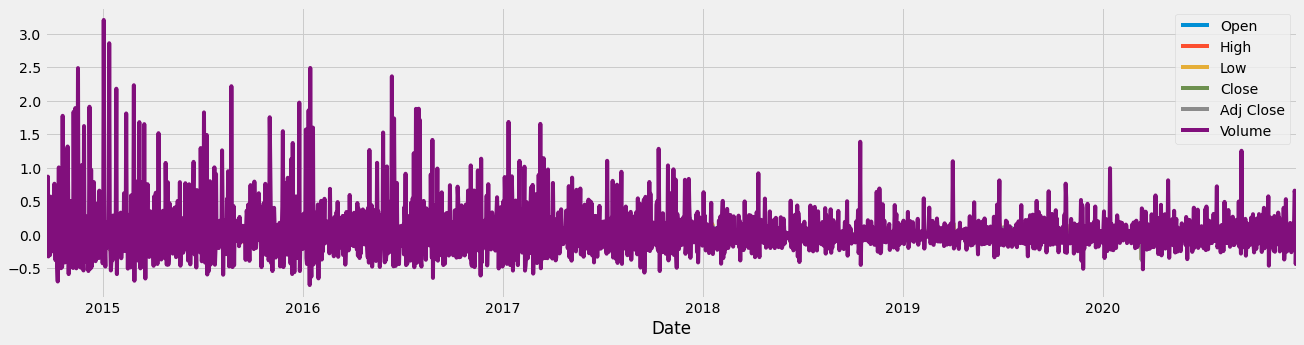

In [8]:
dataPCh = data.pct_change()
display(dataPCh.tail())
dataPCh.plot(figsize=(20,5));

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-17,0.092856,0.096913,0.095618,0.067782,0.067782,0.474556
2020-12-18,0.067960,-0.017238,0.053417,0.014488,0.014488,-0.569468
2020-12-19,0.014196,0.035810,0.018868,0.031141,0.031141,-0.048195
2020-12-20,0.031023,0.005127,0.013975,-0.016582,-0.016582,-0.016856
2020-12-21,-0.011457,-0.006481,-0.042627,-0.025786,-0.025786,0.219030


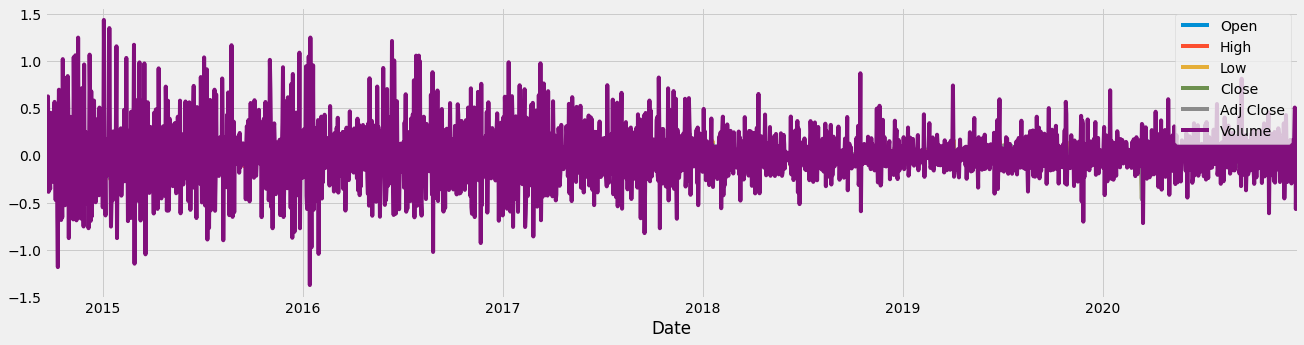

In [9]:
logReturns = np.log(1 + dataPCh)
display(logReturns.tail())
logReturns.plot(figsize=(20,5));

---------------------------- BELOW FROM BOOK CODE --------------------------

[*********************100%***********************]  1 of 1 completed
1601 687
Epoch 1/1
1599/1599 [==============================] - 10s 6ms/step - loss: 0.0133 - accuracy: 6.2539e-04
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
Keras Model Loss =  0.0015536925623372774
Keras Model Accuracy =  0.0006253908504731953


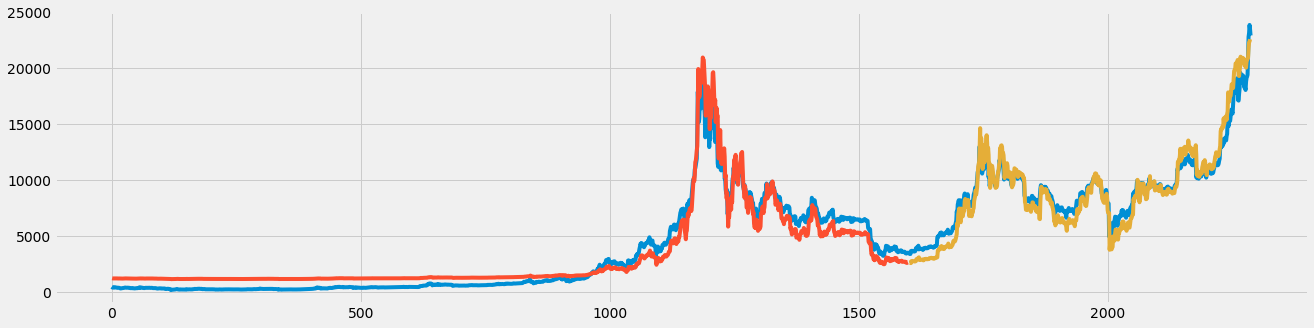

In [22]:
from random import seed

seed(0)

#Data = pd.read_csv('AMZN.csv',header=0, usecols=['Date', 'Close'],parse_dates=True,index_col='Date')
Data = pdr.get_data_yahoo("BTC-USD", start="2000-01-01", end=date.today() - datetime.timedelta(days=0))
Data = Data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

#Data scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
DataScaled = scaler.fit_transform(Data)

#Data splitting
np.random.seed(7)

TrainLen = int(len(DataScaled) * 0.70)
TestLen = len(DataScaled) - TrainLen
TrainData = DataScaled[0:TrainLen,:] 
TestData  = DataScaled[TrainLen:len(DataScaled),:]

print(len(TrainData), len(TestData))


def DatasetCreation(dataset, TimeStep=1):
    DataX, DataY = [], []
    for i in range(len(dataset)-TimeStep-1):
        a = dataset[i:(i+TimeStep), 0]
        DataX.append(a)
        DataY.append(dataset[i + TimeStep, 0])
    return np.array(DataX), np.array(DataY)

TimeStep = 1
TrainX, TrainY = DatasetCreation(TrainData, TimeStep)
TestX, TestY = DatasetCreation(TestData, TimeStep)

TrainX = np.reshape(TrainX, (TrainX.shape[0], 1, TrainX.shape[1]))
TestX = np.reshape(TestX, (TestX.shape[0], 1, TestX.shape[1]))

#Keras LSTM model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(256, input_shape=(1, TimeStep)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(TrainX, TrainY, epochs=1, batch_size=1, verbose=1)
model.summary()

score = model.evaluate(TrainX, TrainY, verbose=0)
print('Keras Model Loss = ',score[0])
print('Keras Model Accuracy = ',score[1])

TrainPred = model.predict(TrainX)
TestPred = model.predict(TestX)

TrainPred = scaler.inverse_transform(TrainPred)
TrainY = scaler.inverse_transform([TrainY])

TestPred = scaler.inverse_transform(TestPred)
TestY = scaler.inverse_transform([TestY])

TrainPredictPlot = np.empty_like(DataScaled)
TrainPredictPlot[:, :] = np.nan
TrainPredictPlot[1:len(TrainPred)+1, :] = TrainPred

TestPredictPlot = np.empty_like(DataScaled)
TestPredictPlot[:, :] = np.nan
TestPredictPlot[len(TrainPred)+(1*2)+1:len(DataScaled)-1, :] = TestPred


plt.figure(figsize=(20,5))
plt.plot(scaler.inverse_transform(DataScaled))
plt.plot(TrainPredictPlot)
plt.plot(TestPredictPlot)
plt.show()

In [23]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
